# AirBnB Listing Analysis

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 

### Profile and QA Data

In [2]:
# Importing data from listing.csv

# Setting the file path
path = '../data/Listings.csv'

# Filtering columns need for analysis
listing_cols = ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']

listings = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False, parse_dates=['host_since'], usecols= listing_cols)

In [3]:
listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [4]:
# Checking the memory usage

listings.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   host_since     279547 non-null  datetime64[ns]
 1   neighbourhood  279712 non-null  object        
 2   city           279712 non-null  object        
 3   accommodates   279712 non-null  int64         
 4   price          279712 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 37.4 MB


In [5]:
# Filtering data for paris city

paris_listings = listings.query("city == 'Paris'")

In [6]:
# Checking memory usage for paris_listings

paris_listings.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.0 MB


In [7]:
# Checking missing values

paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

host_since have 33 missing values. It's small amount of our data. So it's up to us to drop them or leave them as it is. I'm going to leave them as it is!

In [8]:
# Checking duplicate values

paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


Minimum value of accommodate and price is 0. This is not possible since not a single host let any stranger to use their house for free. So this might be a data error or entry error.


In [9]:
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

By filtering out data when price and accommodate is equal to zero we got 54 entries. So this is a small amount of our dataset so it's upto you to filter out them or keep them. I'm keeping them!

### Preparing the data for visualization

In [10]:
# Grouping neighborhood by mean price

paris_listings_neighbourhood = paris_listings.groupby('neighbourhood').agg({'price' : 'mean'}).sort_values('price')

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


1) Neighborhood 'Elysee' have the highest mean price that is 210.54.
2) Neighborhood 'Menilmontant' have the lowest mean price that is 74.94.

In [11]:
# Filtering out the data with highest price neighborhood and then grouping them by accommodates at mean price

paris_listings_accommodates = paris_listings.query("neighbourhood == 'Elysee'").groupby('accommodates').agg({'price' : 'mean'})

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
2,155.103352
3,152.828767
4,212.096070


In [12]:
# Grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

paris_listings_over_time = paris_listings.set_index('host_since').resample('YE').agg({
                                'price' : 'mean', 
                                'neighbourhood' : 'count'})


paris_listings_over_time.head()

,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592


### Data Visualization

In [13]:
# Importing seaborn library
import seaborn as sns

# Setting style to all charts

sns.set_style('darkgrid')

<Axes: title={'center': 'Average Price by neighborhood'}, xlabel='Average Price (Euros)', ylabel='Neighborhood'>

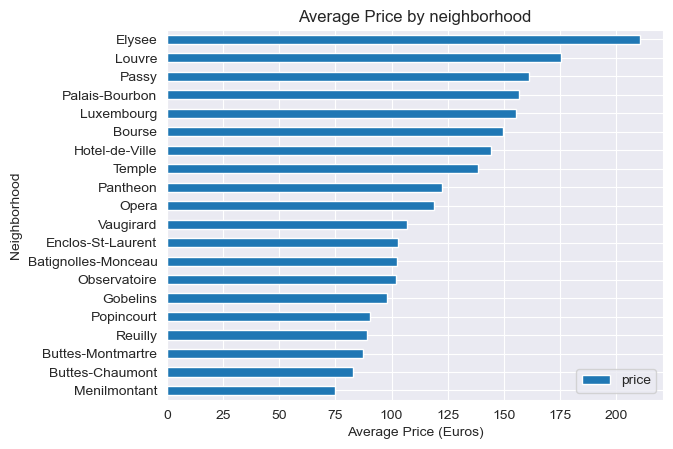

In [14]:
# Plotting average price by neighborhood in Paris

paris_listings_neighbourhood.plot.barh(
    title = 'Average Price by neighborhood',
    xlabel = 'Average Price (Euros)',
    ylabel = 'Neighborhood'
)

<Axes: title={'center': 'Average Price by Accommodates'}, xlabel='Average Price (Euros)', ylabel='Accommodates'>

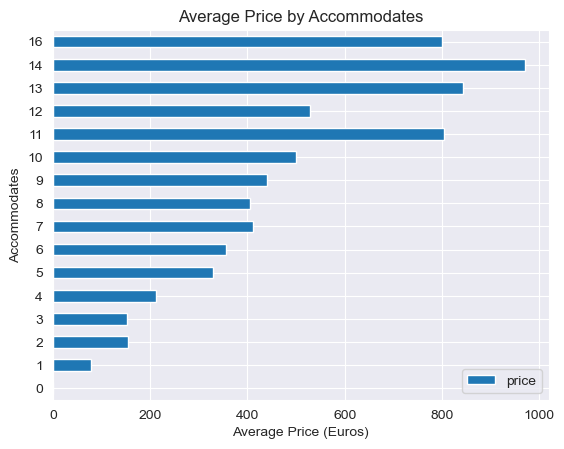

In [15]:
# Plotting average price by accommodates in Paris

paris_listings_accommodates.plot.barh(
    title = 'Average Price by Accommodates',
    xlabel = 'Average Price (Euros)',
    ylabel = 'Accommodates'
)

<Axes: title={'center': 'New AirBnB Hosts in Paris Over Time'}, xlabel='host_since', ylabel='New Hosts'>

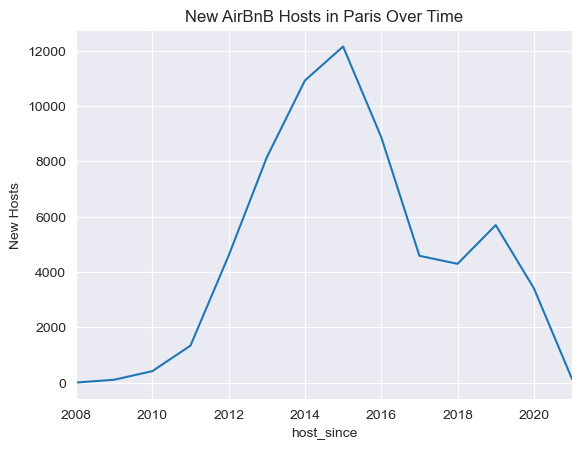

In [16]:
# Plotting the trends of host listing over time

paris_listings_over_time['neighbourhood'].plot(
    title = 'New AirBnB Hosts in Paris Over Time',
    ylabel = 'New Hosts'
)

1) From 2008 to 2015, the number of hosts listing their properties on Airbnb increased steadily. This reflects growing awareness of the platform and more homeowners adopting the short-term rental opportunity as it became a popular trend.
2) New host listings reached their highest point in 2015, indicating strong momentum in Airbnb’s expansion as more property owners capitalized on the growing short-term rental market.

<Axes: title={'center': 'Average AirBnB Price in Paris Over Time'}, xlabel='host_since', ylabel='Average Price(Euros)'>

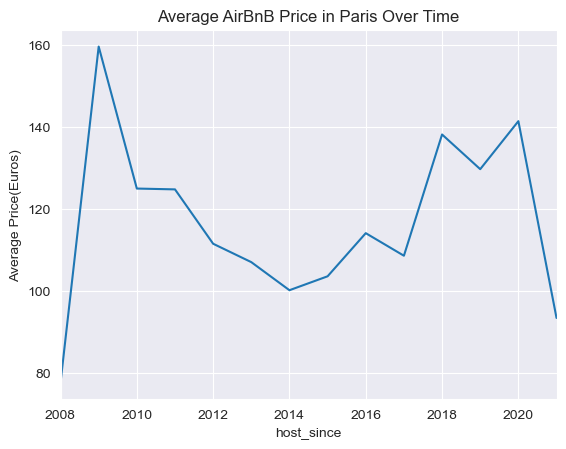

In [17]:
# Plotting the trends of Prices over Time

paris_listings_over_time['price'].plot(
    title = 'Average AirBnB Price in Paris Over Time',
    ylabel = 'Average Price(Euros)'
)

1) In 2009, average prices were approximately €160. As Airbnb was in its early adoption stage, hosts priced listings higher, likely reflecting limited competition and early experimentation with premium pricing. However, demand had not yet fully developed to match the increasing supply.
2) Between 2014–2020, average prices increased consistently, aside from a small decline in 2019. In 2020, the COVID-19 pandemic led to a sudden decrease in pricing due to a major drop in travel demand.

<Axes: title={'center': 'Dual Axis Plot of Paris Listings Over Time'}, xlabel='host_since'>

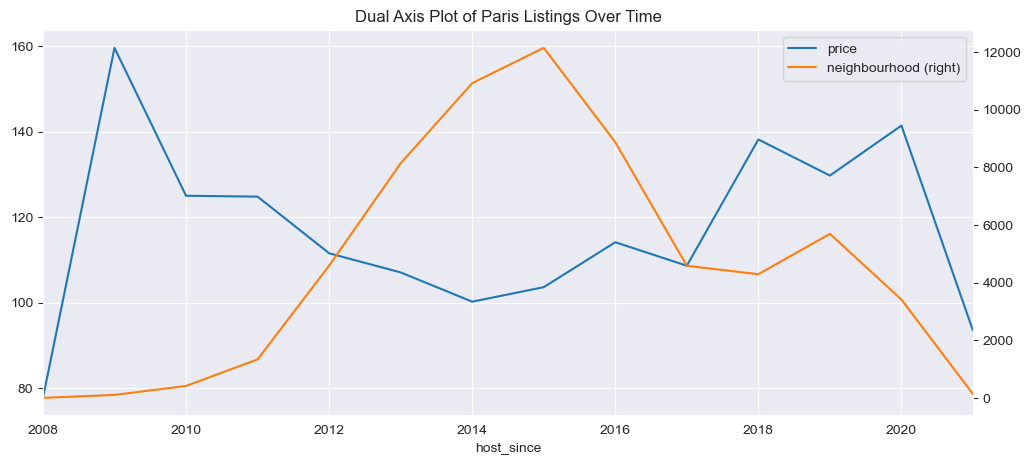

In [18]:
# Plotting the Dual Axis chart for the above separate graphs

paris_listings_over_time.plot(secondary_y = 'neighbourhood',
title = 'Dual Axis Plot of Paris Listings Over Time',
figsize = (12,5))